# **Image Classification**

**Author:** Jann Rovic Cueto

**School:** Asia University Taiwan & Rizal Technological University (2023)

*K-Train Classification using Deep Learning Algorithms. This notebook is used and utilized during my exchange student at taiwan in Design and Artificial Intelligence. Feel free to to use and modified the code.*

> I try to investigate and train different model for image classification of high resolution satellite images to identify land cover classes. See attach pdf and presentation of my research paper.

In [ ]:
# use this codes to run your drive in google colab.
# disregard this if your using jupyter in your computer.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the ktrain package
!pip install ktrain

In [ ]:
# import the necessary packages
import ktrain
from ktrain import vision as vis

In [ ]:
# Load your data from drive or in your directory.
# make sure to change the names according to the name of your datasets.
DATADIR = '/content/drive/MyDrive/Taiwan_IMRAD/satellite_data'
(train_data, test_data, preproc) = vis.images_from_folder(datadir=DATADIR,
                                                          #use a default data augmented with horizontal_flip=true
                                                          #data_aug=vis.get_data_aug(horizontal_flip=True),
                                                          #data_aug = vis.get_data_aug(rotation_range=45),
                                                          train_test_names=['train','validation'],
                                                          target_size=(244,244),color_mode='rgb') # use this to resize the image make sure its .jpg or .png

Found 960 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [ ]:
# Check the identified classes in the directory
preproc.get_classes()

['Impervious Surfaces', 'Pervious Surfaces', 'Vegetation', 'Water']

In [ ]:
# List of pre-trained models
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [ ]:
# Change the classifier and applied the model you want
model = vis.image_classifier('pretrained_resnet50', train_data, test_data) # try other model as much as possible.

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94765736/94765736 [==============================] - 0s 0us/step
pretrained_resnet50 model created.


In [ ]:
# Build the Model
learner = ktrain.get_learner(model=model, train_data=train_data,val_data=test_data,
                             workers=8, use_multiprocessing=False, batch_size=16) # batch size can be adjusted. Depends on the dataset.This depends on the GPU memory of the computer also.

In [ ]:
#learner.freeze(freeze_range=15)

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
60/60 [==============================] - 272s 4s/step - loss: 3.1567 - accuracy: 0.2500
Epoch 2/5
60/60 [==============================] - 237s 4s/step - loss: 1.3766 - accuracy: 0.6062
Epoch 3/5
60/60 [==============================] - 245s 4s/step - loss: 0.2338 - accuracy: 0.9531
Epoch 4/5
60/60 [==============================] - 174s 3s/step - loss: 8.3723 - accuracy: 0.9162


done.
Visually inspect loss plot and select learning rate associated with falling loss


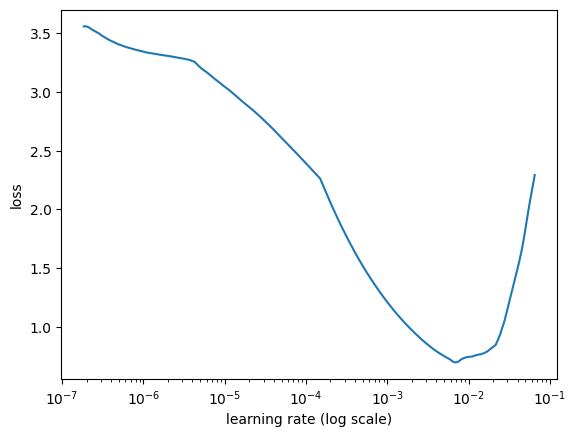

In [ ]:
learner.lr_find(show_plot=True, max_epochs=5) # also this part can be adjusted.

In [ ]:
# Make sure to input the close value in the curve
# This takes times.
learner.autofit(1e-2) #1e-1 change base on the learn curve.

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.01...
Epoch 1/1024
60/60 [==============================] - 335s 6s/step - loss: 2.6141 - accuracy: 0.9219 - val_loss: 1.3285 - val_accuracy: 0.9792
Epoch 2/1024
60/60 [==============================] - 329s 6s/step - loss: 0.2053 - accuracy: 0.9937 - val_loss: 0.3125 - val_accuracy: 0.9917
Epoch 3/1024
60/60 [==============================] - 322s 5s/step - loss: 0.1575 - accuracy: 0.9948 - val_loss: 0.8197 - val_accuracy: 0.9833
Epoch 4/1024
60/60 [==============================] - ETA: 0s - loss: 0.7777 - accuracy: 0.9885
Epoch 00004: Reducing Max LR on Plateau: new max lr will be 0.005 (if not early_stopping).
60/60 [==============================] - 321s 5s/step - loss: 0.7777 - accuracy: 0.9885 - val_loss: 0.7077 - val_accuracy: 0.9792
Epoch 5/1024
60/60 [==============================] - 323s 5s/step - lo

In [ ]:
# Evaluate the model performance
loss, acc = learner.model.evaluate_generator(learner.val_data,
                                             steps=len(learner.val_data))

<ipython-input-14-34962f805229>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = learner.model.evaluate_generator(learner.val_data,


In [ ]:
# Plot the results
learner.validate(class_names=preproc.get_classes())

8/8 [==============================] - 65s 8s/step
                     precision    recall  f1-score   support

Impervious Surfaces       0.98      1.00      0.99        60
  Pervious Surfaces       1.00      1.00      1.00        60
         Vegetation       0.98      1.00      0.99        60
              Water       1.00      0.97      0.98        60

           accuracy                           0.99       240
          macro avg       0.99      0.99      0.99       240
       weighted avg       0.99      0.99      0.99       240



array([[60,  0,  0,  0],
       [ 0, 60,  0,  0],
       [ 0,  0, 60,  0],
       [ 1,  0,  1, 58]])

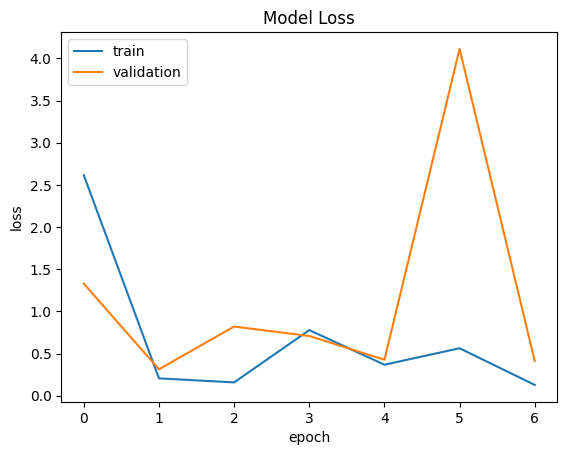

In [ ]:
learner.plot ('loss')

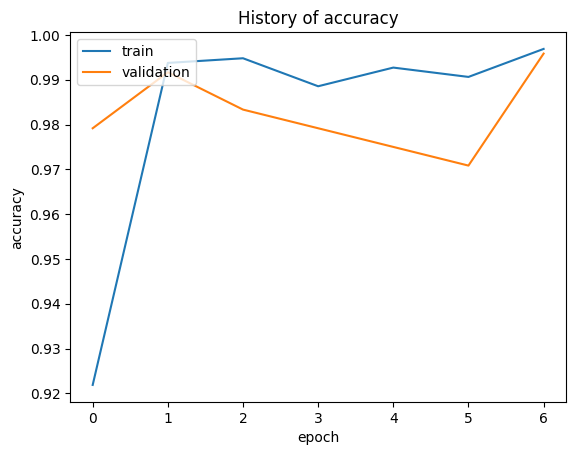

In [ ]:
learner.plot ('accuracy')

In [ ]:
# Check the accuracy of the model.
loss, acc = learner.model.evaluate_generator(learner.val_data,
                                             steps=len(learner.val_data))
print('final loss:%s, final score:%s' % (loss, acc))

<ipython-input-18-afe9aea5f36f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = learner.model.evaluate_generator(learner.val_data,


final loss:0.3125147521495819, final score:0.9916666746139526


In [ ]:
# Test the model to unseed images.
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
predictor.predict_filename('/content/drive/MyDrive/TaiwanYolo4/Test/Highway_508.jpg')

After you run all the codes you have now a simple ktrain model of image classification. Make sure to adjust the hyperparameter tuning in order to minimize the overfitting of the model. Thank you for reading my notebook. ❤